In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from nltk import classify
from nltk.classify.scikitlearn import SklearnClassifier

# Tratamento da Base de Dados

In [3]:
# Database do https://brasil.io/dataset/genero-nomes/nomes/
dfData = pd.read_csv("grupos.csv") #csv com a base de dados
dfData

,name,classification,frequency_female,frequency_male,frequency_total,ratio,names
0,ALINE,F,528515,2035,530550,0.996164,|AALINE|AILINE|ALEINE|ALIINE|ALINE|ALINER|ALIN...
1,ARAO,M,0,3526,3526,1.000000,|AARAO|ARAAO|ARAO|
2,ARON,M,0,3442,3442,1.000000,|AARON|AHARON|AROM|ARON|ARYON|HARON|
3,ADA,F,5294,289,5583,0.948236,|ABA|ADA|ADAH|ADAR|ADHA|HADA|
4,ABADE,M,0,57,57,1.000000,|ABADE|
...,...,...,...,...,...,...,...
50738,ZUNEIDE,F,283,0,283,1.000000,|SUNEIDE|ZUNEIDE|
50739,ZUNILDA,F,206,0,206,1.000000,|SUNILDA|ZUNILDA|
50740,ZUNIRA,F,139,0,139,1.000000,|ZUNIRA|
50741,ZURENE,F,32,0,32,1.000000,|ZURENE|


### Divisão dos dados

In [4]:
names = dfData["name"].apply(lambda x: x.lower())
classification = dfData['classification']

In [5]:
def prepareData(names, genders):
    dataSet = list()
    for name, gender in zip(names, genders):
        dictName = {'name':name,
                    'firstChar':name[0],
                    'lastChar':name[-1],
                    'lastTwoChar':name[-2:],
                    'lastThreeChar':name[-3:],
                    'length':len(name)
                    }
        dataSet.append((dictName, gender))
    
    return dataSet

In [6]:
data = prepareData(names, classification)

In [7]:
treino, teste = train_test_split(data, test_size=0.2, random_state=28)

# Teste do SVM com diferentes Kernels

In [8]:
def compare_plot(y_test, y_pred):
    plt.title("Comparison of Data")
    plt.plot(y_test[0:100], 'g--x')
    plt.plot(y_pred[0:100], 'r:o')
    plt.ylabel("class")
    plt.xlabel("data")
    plt.legend(["Real","Predict"], loc='upper left')
    plt.show()

In [9]:
execute = 5

            SVC with linear kernel

In [10]:
lineartime = list()
linearacc = list()

linearclf = SklearnClassifier(svm.SVC(kernel="linear", C=10.0))

In [11]:
for i in range(execute):
    init = time.perf_counter()
    linearclf = linearclf.train(treino)
    linearacc.append(classify.accuracy(linearclf, teste))
    lineartime.append(time.perf_counter() - init)

In [12]:
linear_test = [x[1] for x in teste]
linear_pred = linearclf.classify_many([x[0] for x in teste])
linearcm = confusion_matrix(y_true=linear_test, y_pred=linear_pred)
linearcm

array([[4992,  343],
       [ 355, 4459]])

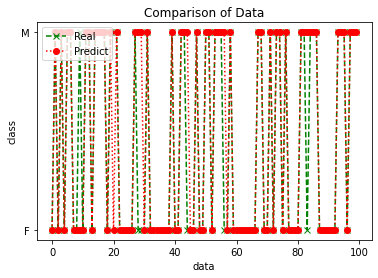

In [13]:
compare_plot(linear_test, linear_pred)

            LinearSVC

In [14]:
linearSVCtime = list()
linearSVCacc = list()

linearSVCclf = SklearnClassifier(svm.LinearSVC(C=1.0, max_iter=1000000))

In [15]:
for i in range(execute):
    init = time.perf_counter()
    linearSVCclf = linearSVCclf.train(treino)
    linearSVCacc.append(classify.accuracy(linearSVCclf, teste))
    linearSVCtime.append(time.perf_counter() - init)

In [16]:
linearSVC_test = [x[1] for x in teste]
linearSVC_pred = linearSVCclf.classify_many([x[0] for x in teste])
linearSVCcm = confusion_matrix(y_true=linearSVC_test, y_pred=linearSVC_pred)
linearSVCcm

array([[4992,  343],
       [ 352, 4462]])

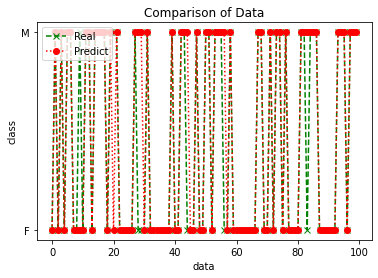

In [17]:
compare_plot(linearSVC_test, linearSVC_pred)

            SVC with RBF kernel

In [18]:
rbftime = list()
rbfacc = list()

rbfclf = SklearnClassifier(svm.SVC(kernel="rbf", gamma=0.01, C=100.0))

In [19]:
for i in range(execute):
    init = time.perf_counter()
    rbfclf = rbfclf.train(treino)
    rbfacc.append(classify.accuracy(rbfclf, teste))
    rbftime.append(time.perf_counter() - init)

In [20]:
rbf_test = [x[1] for x in teste]
rbf_pred = rbfclf.classify_many([x[0] for x in teste])
rbfcm = confusion_matrix(y_true=rbf_test, y_pred=rbf_pred)
rbfcm

array([[5027,  308],
       [ 352, 4462]])

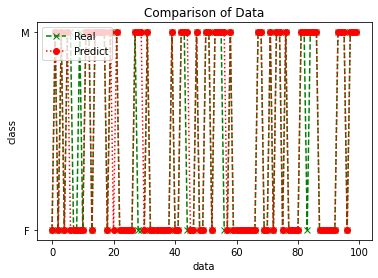

In [21]:
compare_plot(rbf_test, rbf_pred)

            NuSVC with RBF kernel

In [22]:
nurbftime = list()
nurbfacc = list()

nurbfclf = SklearnClassifier(svm.NuSVC(kernel="rbf", gamma=0.01, nu=0.1))

In [23]:
for i in range(execute):
    init = time.perf_counter()
    nurbfclf = nurbfclf.train(treino)
    nurbfacc.append(classify.accuracy(nurbfclf, teste))
    nurbftime.append(time.perf_counter() - init)

In [24]:
nurbf_test = [x[1] for x in teste]
nurbf_pred = nurbfclf.classify_many([x[0] for x in teste])
nurbfcm = confusion_matrix(y_true=nurbf_test, y_pred=nurbf_pred)
nurbfcm

array([[5022,  313],
       [ 353, 4461]])

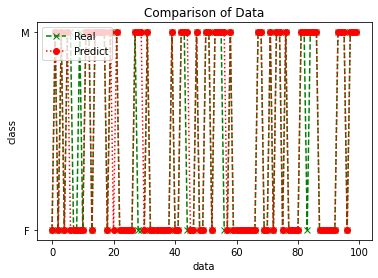

In [25]:
compare_plot(nurbf_test, nurbf_pred)

            SVC with Poly kernel

In [26]:
polytime = list()
polyacc = list()

polyclf = SklearnClassifier(svm.SVC(kernel='poly', gamma='auto', degree=1, C=100.0))

In [27]:
for i in range(execute):
    init = time.perf_counter()
    polyclf = polyclf.train(treino)
    polyacc.append(classify.accuracy(polyclf, teste))
    polytime.append(time.perf_counter() - init)

In [28]:
poly_test = [x[1] for x in teste]
poly_pred = polyclf.classify_many([x[0] for x in teste])
polycm = confusion_matrix(y_true=poly_test, y_pred=poly_pred)
polycm

array([[4826,  509],
       [ 489, 4325]])

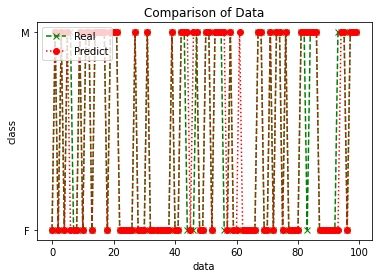

In [29]:
compare_plot(poly_test, poly_pred)

            NuSVC with Poly kernel

In [30]:
nupolytime = list()
nupolyacc = list()

nupolyclf = SklearnClassifier(svm.NuSVC(kernel='poly', gamma='auto', degree=1, nu=0.3))

In [31]:
for i in range(execute):
    init = time.perf_counter()
    nupolyclf = nupolyclf.train(treino)
    nupolyacc.append(classify.accuracy(nupolyclf, teste))
    nupolytime.append(time.perf_counter() - init)

In [32]:
nupoly_test = [x[1] for x in teste]
nupoly_pred = nupolyclf.classify_many([x[0] for x in teste])
nupolycm = confusion_matrix(y_true=nupoly_test, y_pred=nupoly_pred)
nupolycm

array([[4826,  509],
       [ 489, 4325]])

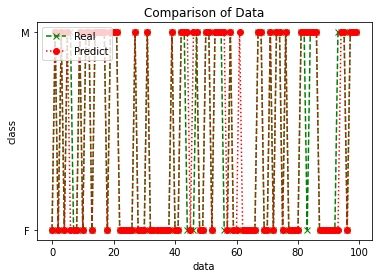

In [33]:
compare_plot(nupoly_test, nupoly_pred)

            SVC with Sigmoid kernel

In [34]:
sigmoidtime = list()
sigmoidacc = list()

sigmoidclf = SklearnClassifier(svm.SVC(kernel='sigmoid', gamma=0.01, C=0.01))

In [35]:
for i in range(execute):
    init = time.perf_counter()
    sigmoidclf = sigmoidclf.train(treino)
    sigmoidacc.append(classify.accuracy(sigmoidclf, teste))
    sigmoidtime.append(time.perf_counter() - init)

In [36]:
sigmoid_test = [x[1] for x in teste]
sigmoid_pred = sigmoidclf.classify_many([x[0] for x in teste])
sigmoidcm = confusion_matrix(y_true=sigmoid_test, y_pred=sigmoid_pred)
sigmoidcm

array([[5129,  206],
       [1477, 3337]])

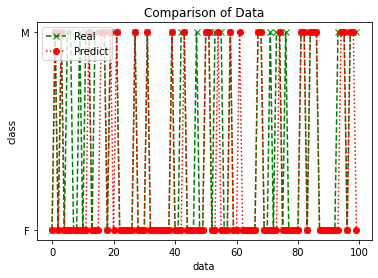

In [37]:
compare_plot(sigmoid_test, sigmoid_pred)

            NuSVC with Sigmoid kernel

In [38]:
nusigmoidtime = list()
nusigmoidacc = list()

nusigmoidclf = SklearnClassifier(svm.NuSVC(kernel='sigmoid', gamma=0.01, nu=0.9))

In [39]:
for i in range(execute):
    init = time.perf_counter()
    nusigmoidclf = nusigmoidclf.train(treino)
    nusigmoidacc.append(classify.accuracy(nusigmoidclf, teste))
    nusigmoidtime.append(time.perf_counter() - init)

In [40]:
nusigmoid_test = [x[1] for x in teste]
nusigmoid_pred = nusigmoidclf.classify_many([x[0] for x in teste])
nusigmoidcm = confusion_matrix(y_true=nusigmoid_test, y_pred=nusigmoid_pred)
nusigmoidcm

array([[4796,  539],
       [ 615, 4199]])

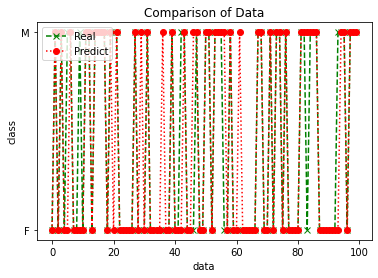

In [41]:
compare_plot(nusigmoid_test, nusigmoid_pred)

Comparação dos resultados

In [42]:
dfValues = pd.DataFrame()
dfValues["accuracy(%)"] = [np.array(x).mean()*100 for x in [linearacc, linearSVCacc, rbfacc, nurbfacc, polyacc, nupolyacc, sigmoidacc, nusigmoidacc]]
dfValues["time(s)"]     = [np.array(x).mean() for x in [lineartime, linearSVCtime, rbftime, nurbftime, polytime, nupolytime, sigmoidtime, nusigmoidtime]]
dfValues["Title"]       = ["Linear kernel", "LinearSVC", "RBF kernel", "Nu RBF kernel", "Poly kernel", "Nu Poly kernel", "Sigmoid kernel", "Nu Sigmoid Kernel"]

In [43]:
dfValues.sort_values("accuracy(%)", ascending=False, ignore_index=True)

,accuracy(%),time(s),Title
0,93.496896,295.416882,RBF kernel
1,93.437777,265.209698,Nu RBF kernel
2,93.152035,2.577079,LinearSVC
3,93.122475,328.700734,Linear kernel
4,90.166519,49.840284,Poly kernel
5,90.166519,51.431449,Nu Poly kernel
6,88.629422,152.487564,Nu Sigmoid Kernel
7,83.417085,144.762417,Sigmoid kernel


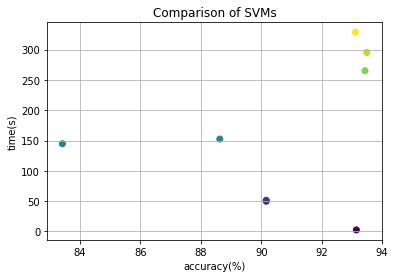

In [44]:
plt.scatter(dfValues["accuracy(%)"], dfValues["time(s)"], c=dfValues["time(s)"])
plt.xlabel("accuracy(%)")
plt.ylabel("time(s)")
plt.grid(True)
plt.title("Comparison of SVMs")
plt.show()